In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import re
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [12]:
#Dataset
Wine = datasets.load_wine()
df = pd.DataFrame(data=Wine.data, columns=Wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [15]:
df.rename(columns={'alcohol':'ALCOHOL','malic_acid':'M_A','ash':'ASH','alcalinity_of_ash':'A_O_A','magnesium':'Mg','total_phenols':'T_P','flavanoids':'Fl',
                   'nonflavanoid_phenols':'NF_P','proanthocyanins':'Pro','color_intensity':'C_I','hue':'HUE','od280/od315_of_diluted_wines':'OD280-315_O_D_W','proline':'PROLINE'},inplace=True)
df.head()

,ALCOHOL,M_A,ASH,A_O_A,Mg,T_P,Fl,NF_P,Pro,C_I,HUE,OD280-315_O_D_W,PROLINE
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


from matplotlib import pyplot as plt
_df_0['ALCOHOL'].plot(kind='hist', bins=20, title='ALCOHOL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['M_A'].plot(kind='hist', bins=20, title='M_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ASH'].plot(kind='hist', bins=20, title='ASH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['A_O_A'].plot(kind='hist', bins=20, title='A_O_A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ALCOHOL', y='M_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='M_A', y='ASH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ASH', y='A_O_A', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='A_O_A', y='Mg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ALCOHOL'].plot(kind='line', figsize=(8, 4), title='ALCOHOL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['M_A'].plot(kind='line', figsize=(8, 4), title='M_A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ASH'].plot(kind='line', figsize=(8, 4), title='ASH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['A_O_A'].plot(kind='line', figsize=(8, 4), title='A_O_A')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
scaled_data = pd.DataFrame(scalar.fit_transform(df))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


from matplotlib import pyplot as plt
scaled_data[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_data[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

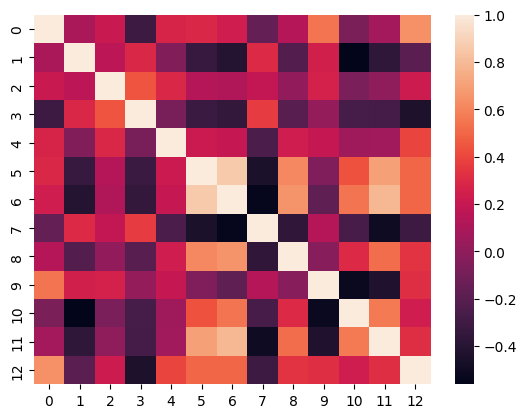

In [18]:
sns.heatmap(scaled_data.corr())

<Axes: >

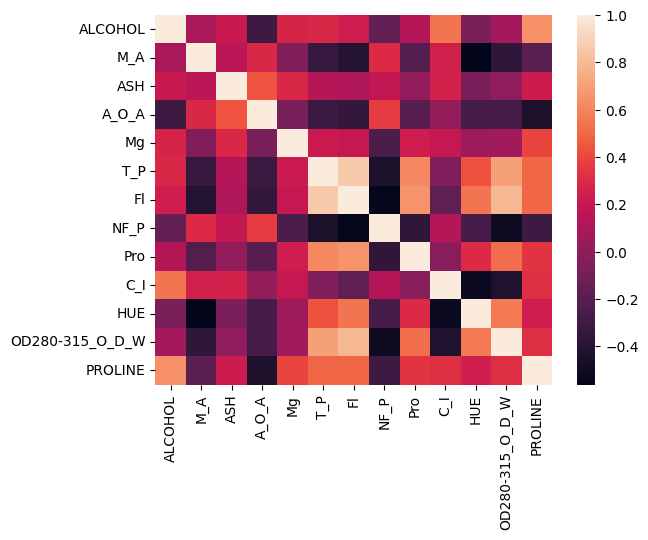

In [19]:
sns.heatmap(df.corr())

In [20]:
#PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca = pd.DataFrame(x_pca,columns=['PC1','PC2','PC3','PC4'])
x_pca

,PC1,PC2,PC3,PC4
0,3.316751,1.443463,-0.165739,-0.215631
1,2.209465,-0.333393,-2.026457,-0.291358
2,2.516740,1.031151,0.982819,0.724902
3,3.757066,2.756372,-0.176192,0.567983
4,1.008908,0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527
174,-2.601956,1.757229,0.207581,0.349496
175,-2.677839,2.760899,-0.940942,0.312035
176,-2.387017,2.297347,-0.550696,-0.688285


from matplotlib import pyplot as plt
x_pca['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_pca['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

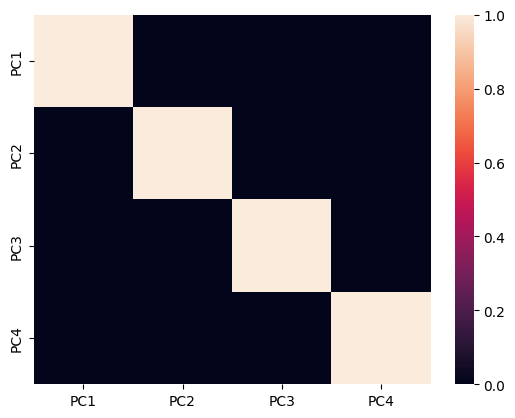

In [21]:
sns.heatmap(x_pca.corr())

#CONCLUSION :  Reducation of wine ddata sample for the dimensiolaity using PCA-analysis rises a quick analysis data table with auto graphical-distrillation about the raw data to sample splits and analysis data